# Assignment 1
- download historical data (candles) for your chosen instrument or instruments, hourly time period or even more frequent,
- calculated the moving average value,
- make a decision on an order (enter the market, exit the market, do nothing), either in accordance with a mean-reverting strategy as discussed - during the class or another strategy, if you feel like doing so, you can use market orders and/or limit/stop orders,
- consider how stop loss / trailing stop loss fits into your strategy and implement it at will,
- make sure your strategy is set up in such a way that it will do some trading during a week, so we can look at the results together.

In [1]:
import time
from services.account import AccountManager
from services.instrument import InstrumentHandler
from strategies.simple_mean_average import SimpleMovingAverage
from config.constants import GRANULARITY_SECONDS

In [3]:
acc_mananger = AccountManager()


In [4]:
acc_mananger.getAccountId()


'101-012-21247389-001'

In [5]:
# Buy Order
# acc_mananger.createOrder("BUY","BTC_USD", 46103.0, 0.02).json()

# Sell Order
# acc_mananger.createOrder("SELL","BTC_USD", 46103.0, 0.02).json()

In [6]:
def getCurrTime():
    return time.strftime("%Y-%m-%d %H:%M:%S")

# TODO: Create Generic strategy class with shared methods
def startTrading(asset: SimpleMovingAverage):
    while True:
        print(getCurrTime())
        asset.applyStategy()
        time.sleep(GRANULARITY_SECONDS)

In [7]:
btc_usd_sma = SimpleMovingAverage("BTC_USD")
eur_usd_sma = SimpleMovingAverage("EUR_USD")
# Set trading algotithm on threads and add event to stop bot
startTrading(btc_usd_sma)

BTC_USD Initialized
EUR_USD Initialized
2022-01-19 16:12:37
Position: 0.0 | Percentile Dist: 0.998654978553732 | Ratio: 1.0005273088623252 | Close: 42439.0


KeyboardInterrupt: 

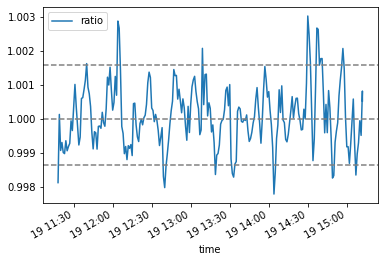

In [8]:
btc_usd_sma.visualizePercentiles()


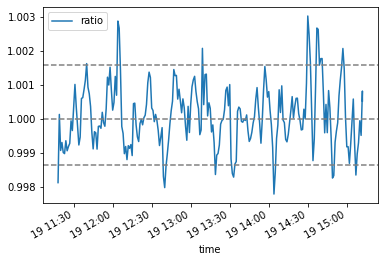

In [9]:
btc_usd_sma.visualizePercentiles()


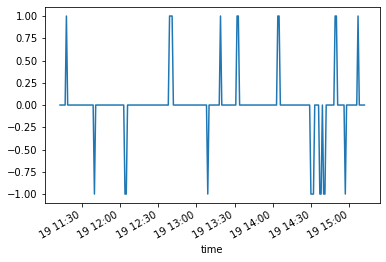

In [10]:
btc_usd_sma.visualizeSignals()


In [11]:
btc_usd_sma = SimpleMovingAverage("BTC_USD")

BTC_USD Initialized


In [12]:
btc_usd_sma.data

,o,h,l,c,returns,ma,ratio,position
time,,,,,,,,
2022-01-19 11:14:00+00:00,42139.4,42172.6,42071.6,42071.6,NaN,NaN,NaN,0.0
2022-01-19 11:15:00+00:00,42071.8,42186.6,42070.4,42098.8,27.2,NaN,NaN,0.0
2022-01-19 11:16:00+00:00,42099.3,42115.0,42052.0,42056.9,-41.9,NaN,NaN,0.0
2022-01-19 11:17:00+00:00,42056.8,42070.2,42012.2,42034.8,-22.1,NaN,NaN,0.0
2022-01-19 11:18:00+00:00,42035.2,42035.3,41983.8,41985.9,-48.9,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
2022-01-19 15:09:00+00:00,42401.3,42435.0,42392.0,42406.0,4.4,42435.800000,0.999298,0.0
2022-01-19 15:10:00+00:00,42406.0,42429.8,42401.6,42424.4,18.4,42426.733333,0.999945,0.0
2022-01-19 15:11:00+00:00,42423.5,42487.6,42373.0,42386.6,-37.8,42407.200000,0.999514,0.0


In [13]:
btc_usd_sma.plotCandles()



In [14]:
import backtesting

/usr/local/lib/python3.9/site-packages/backtesting/_plotting.py:50: UserWarning:

Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.



Loading BokehJS ...

In [15]:
backtesting.Strategy()

TypeError: Can't instantiate abstract class Strategy with abstract methods init, next

In [16]:
from backtesting.test import GOOG

GOOG.tail()

,Open,High,Low,Close,Volume
2013-02-25,802.3,808.41,790.49,790.77,2303900
2013-02-26,795.0,795.95,784.40,790.13,2202500
2013-02-27,794.8,804.75,791.11,799.78,2026100
2013-02-28,801.1,806.99,801.03,801.20,2265800
2013-03-01,797.8,807.14,796.15,806.19,2175400
